# 1. 인트로

## 1.1 문제 유형 및 데이터 정리

<코드 링크>https://dacon.io/competitions/open/235536/overview/description

1. movies_train.csv / movies_test.csv\
title : 영화의 제목\
distributor : 배급사\
genre : 장르\
release_time : 개봉일\
time : 상영시간(분)\
screening_rat : 상영등급\
director : 감독이름\
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)\
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)\
num_staff : 스텝수\
num_actor : 주연배우수\
box_off_num : 관객수

2.  submission.csv (제출 파일 형식)

<데이터 상세 설명>
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터

## 1.2 패키지 로드

In [377]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

##1.3 데이터 로드

In [378]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [379]:
path = '/content/gdrive/MyDrive/MOVIE/NumofAudi/'

df_train = pd.read_csv(path + 'movies_train.csv')
df_test = pd.read_csv(path + 'movies_test.csv')
df_sub = pd.read_csv(path + 'submission.csv')

In [380]:
df_train.head(20)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [381]:
df_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# 2. 전처리

In [382]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [383]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [384]:
print("배급사 수 : ", len(df_train.distributor.unique()))
print("장르 수 : ", len(df_train.genre.unique()))
print("상영등급 수 : ", len(df_train.screening_rat.unique()))
print("감독 수 : ", len(df_train.director.unique()))

배급사 수 :  169
장르 수 :  12
상영등급 수 :  4
감독 수 :  472


관객수 관련도 확인

In [385]:
df_train.corr().box_off_num

time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [386]:
data = pd.concat([df_train,df_test])
data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,NaN
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4,NaN


In [387]:
dis_size = data.distributor.value_counts()
dis_size.head(15)

CJ 엔터테인먼트    85
롯데엔터테인먼트     76
(주)마운틴픽쳐스    43
(주)쇼박스       38
인디스토리        37
(주)NEW       36
골든타이드픽처스     27
(주) 케이알씨지    19
(주)키노아이      15
KT&G 상상마당    14
시네마달         13
어뮤즈          13
인벤트 디        12
NEW          12
영화사 진진       12
Name: distributor, dtype: int64

In [388]:
for i in range(843):
  data.distributor.iloc[i] =dis_size[data.distributor.iloc[i]]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [389]:
data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
238,해에게서 소년에게,1,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,NaN
239,울보 권투부,37,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,1,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,1,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,NaN
242,조선안방 스캔들-칠거지악 2,19,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4,NaN


In [390]:
data_train = data.iloc[:600,:]
data_test = data.iloc[600:,:-1]

In [391]:
data_train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,36,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091.0
596,파파로티,38,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438.0
597,살인의 강,43,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475.0
598,악의 연대기,85,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525.0
599,베를린,85,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532.0


In [392]:
data_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,7,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,38,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,85,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,38,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,85,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [393]:
data_train = pd.concat([data_train, pd.get_dummies(data_train["genre"])], axis =1)
data_train = pd.concat([data_train, pd.get_dummies(data_train["screening_rat"])], axis =1)
data_train.drop(["genre","screening_rat"],axis=1,inplace=True)

data_test = pd.concat([data_test, pd.get_dummies(data_test["genre"])], axis =1)
data_test = pd.concat([data_test, pd.get_dummies(data_test["screening_rat"])], axis =1)
data_test.drop(["genre","screening_rat"],axis=1,inplace=True)


In [394]:
data_train.head()

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,개들의 전쟁,76,2012-11-22,96,조병옥,NaN,0,91,2,23398.0,...,0,0,0,0,1,0,0,0,0,1
1,내부자들,38,2015-11-19,130,우민호,1161602.50,2,387,3,7072501.0,...,0,0,0,0,0,0,0,0,0,1
2,은밀하게 위대하게,38,2013-06-05,123,장철수,220775.25,4,343,4,6959083.0,...,0,0,0,0,1,0,0,1,0,0
3,나는 공무원이다,36,2012-07-12,101,구자홍,23894.00,2,20,6,217866.0,...,0,0,0,0,0,1,0,0,1,0
4,불량남녀,4,2010-11-04,108,신근호,1.00,1,251,2,483387.0,...,0,0,0,0,0,1,0,1,0,0


In [395]:
data_train.corr().box_off_num

time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
SF                0.088009
공포               -0.017627
느와르               0.184869
다큐멘터리            -0.150310
드라마              -0.034488
멜로/로맨스           -0.059728
뮤지컬              -0.035211
미스터리             -0.016888
서스펜스             -0.019807
애니메이션            -0.054872
액션                0.181191
코미디               0.082780
12세 관람가           0.033896
15세 관람가           0.210368
전체 관람가           -0.133525
청소년 관람불가         -0.135180
Name: box_off_num, dtype: float64

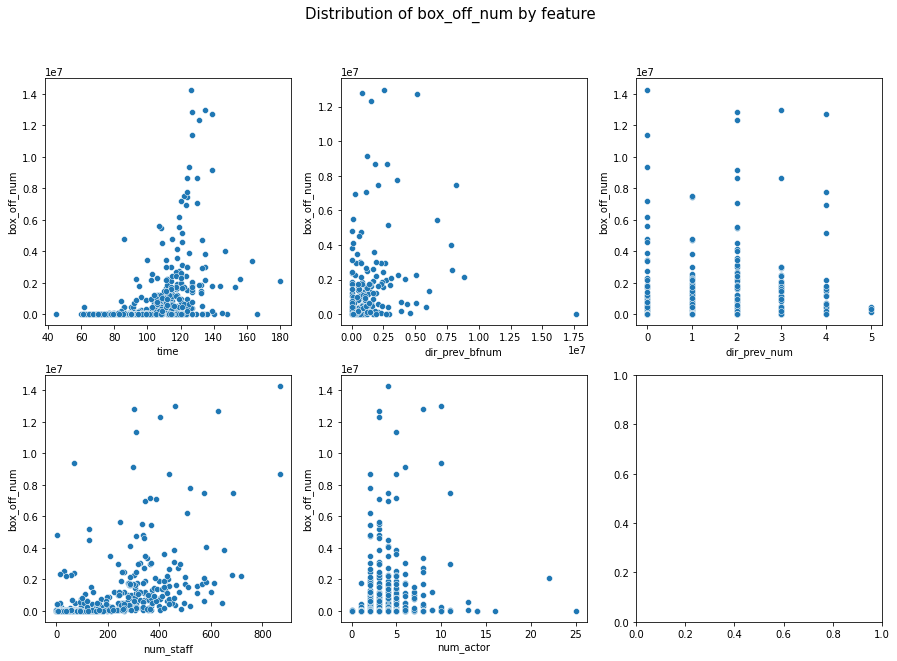

In [396]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))

sns.scatterplot(x = 'time', y = 'box_off_num',data = df_train, ax = axes[0][0])
sns.scatterplot(x = 'dir_prev_bfnum', y = 'box_off_num',data = df_train, ax = axes[0][1])
sns.scatterplot(x = 'dir_prev_num', y = 'box_off_num',data = df_train, ax = axes[0][2])
sns.scatterplot(x = 'num_staff', y = 'box_off_num',data = df_train, ax = axes[1][0])
sns.scatterplot(x = 'num_actor', y = 'box_off_num',data = df_train, ax = axes[1][1])

plt.suptitle("Distribution of box_off_num by feature",fontsize=15,va='top',ha='center')
plt.show()

##2.1 dir_prev_bfnum 배제 하는 경우

In [397]:
data_train.columns

Index(['title', 'distributor', 'release_time', 'time', 'director',
       'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num', 'SF', '공포', '느와르', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬',
       '미스터리', '서스펜스', '애니메이션', '액션', '코미디', '12세 관람가', '15세 관람가', '전체 관람가',
       '청소년 관람불가'],
      dtype='object')

In [398]:
data_train1 = data_train[['distributor', 'time',
       'dir_prev_num', 'num_staff', 'num_actor',
       '느와르', '액션', '15세 관람가',"box_off_num"]]

data_test = data_test[['distributor', 'time',
       'dir_prev_num', 'num_staff', 'num_actor',
       '느와르', '액션', '15세 관람가']]

##2.2 dir_prev_bfnum 예측 하는 경우

In [399]:
# df_train_mat = df_train[df_train["dir_prev_num"]>0]
# df_train_ama = df_train[df_train["dir_prev_num"]==0]

# df_train_mat.corr().dir_prev_bfnum

In [400]:
# x = df_train_mat[["time","dir_prev_num","num_staff","num_actor","box_off_num"]]
# y = df_train_mat["dir_prev_bfnum"]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=42 )


#3. 학습 & 예측

In [401]:
data_train1.head()

,distributor,time,dir_prev_num,num_staff,num_actor,느와르,액션,15세 관람가,box_off_num
0,76,96,0,91,2,0,1,0,23398.0
1,38,130,2,387,3,1,0,0,7072501.0
2,38,123,4,343,4,0,1,1,6959083.0
3,36,101,2,20,6,0,0,0,217866.0
4,4,108,1,251,2,0,0,1,483387.0


In [402]:
splitter = KFold(n_splits=5, shuffle=True, random_state=1)

sta_rafo = Pipeline([("scaler",StandardScaler()),("model",RandomForestRegressor(n_jobs=-1, random_state=1, max_depth=4))])

x, y = data_train1.iloc[:, :-1], data_train.iloc[:, -1]

result_train = []
result_predict = []
result_rmse = []
result_mae = []
result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = sta_rafo.fit(train_x, train_y)

    result_train.append(reg.score(train_x, train_y))
    result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = sta_rafo.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    result_r2.append(r2)

    print("\n")

train score :  0.44749056319750047
test score :  0.3886898386430999
RMSE : 0.3785179243682173
MAE : 0.2876958877848002
r2_score : 0.3886898386430999


train score :  0.45605357381188516
test score :  0.3298566532587919
RMSE : 0.3720883684387851
MAE : 0.2774733122135243
r2_score : 0.3298566532587919


train score :  0.4500534642265054
test score :  0.3586779735788951
RMSE : 0.39362624421304226
MAE : 0.3144833214643443
r2_score : 0.3586779735788951


train score :  0.45974040193667687
test score :  0.2935399391643865
RMSE : 0.37874878234891673
MAE : 0.2835698404078929
r2_score : 0.2935399391643865


train score :  0.456081618803015
test score :  0.35553818409404603
RMSE : 0.38073501846568875
MAE : 0.30025913127687326
r2_score : 0.35553818409404603




In [403]:
# splitter = KFold(n_splits=5, shuffle=True, random_state=1)

# sta_line = Pipeline([("scaler",StandardScaler()),("model",LinearRegression())])

# x, y = data_train1.iloc[:, :-1], data_train.iloc[:, -1]

# result_train = []
# result_predict = []
# result_rmse = []
# result_mae = []
# result_r2 = []

# # result_loss

# for i, ii in splitter.split(x, y):

#     train_x, train_y = x.iloc[i], y.iloc[i]
#     test_x, test_y = x.iloc[ii], y.iloc[ii]

#     reg = sta_line.fit(train_x, train_y)

#     result_train.append(reg.score(train_x, train_y))
#     result_predict.append(reg.score(test_x, test_y))

#     print('train score : ', reg.score(train_x, train_y))
#     print('test score : ',  reg.score(test_x, test_y))

#     pred_ranfo = sta_line.predict(test_x)
#     rmse = mean_squared_error(test_y, pred_ranfo)**0.5
#     print("RMSE :", rmse)
#     result_rmse.append(rmse)


#     mae = mean_absolute_error(test_y, pred_ranfo)
#     print("MAE :", mae)
#     result_mae.append(mae)


#     x_data = np.array(test_y)
#     y_data = np.array(pred_ranfo)

#     r2 = r2_score(x_data, y_data)
#     print("r2_score :", r2)
#     result_r2.append(r2)

#     print("\n")

#4. 성능 지표 확인

In [404]:
print("학습률 평균 : ",np.array(result_train).mean())
print("예측률 평균 : ",np.array(result_predict).mean())
print("RMSE 평균 : ",np.array(result_rmse).mean())
print("MAE 평균 : ",np.array(result_mae).mean())
print("R2_SCORE 평균 : ",np.array(result_r2).mean())

학습률 평균 :  0.4538839243951166
예측률 평균 :  0.34526051774784394
RMSE 평균 :  0.38074326756693
MAE 평균 :  0.292696298629487
R2_SCORE 평균 :  0.34526051774784394


# 5. 저장